In [1]:
# https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
import numpy as np
import pandas as pd

import pyspark

from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

df = spark.sql("select 'spark' as hello ")

df.show()

+-----+
|hello|
+-----+
|spark|
+-----+



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pyspark import SparkContext
try:
    sc = SparkContext('local', 'Pyspark demo')
except ValueError:
    print('SparkContext already exists!')
from pyspark.sql import SparkSession
try:
    spark = SparkSession.builder.appName('Dataset_Analysis').getOrCreate()
except ValueError:
    print('SparkSession already exists!')

spark_df1 = spark.read.csv("FW_PG_Meteo.csv", header=True)
print(spark_df1.show(10))

SparkContext already exists!
+----+-----+---+----+------+------+-----------+----------+--------------+-----------+-----------------+------------+-------------+---------+-----------------+-----------------+
|Year|Month|Day|Hour|Minute|Second|      FW_PG|Wind_Speed|Wind_Direction|Temperature|Relative_Humidity|    Pressure|Precipitation|Dew Point|Absolute_Humidity|Specific_Humidity|
+----+-----+---+----+------+------+-----------+----------+--------------+-----------+-----------------+------------+-------------+---------+-----------------+-----------------+
|2018|    1|  1|   0|     0|     0| 106.772863|  0.240000|      8.930000|   2.690000|        89.670000| 1011.000000|     0.000000| 1.149374|         5.223580|         0.804220|
|2018|    1|  1|   0|     1|     0| 105.187933|  0.290000|      8.900000|   2.740000|        90.250000| 1011.010000|     0.000000| 1.288370|         5.275076|         0.805798|
|2018|    1|  1|   0|     2|     0| 119.689349|  0.100000|      8.110000|   2.600000| 

In [3]:
from pyspark.sql.functions import col, isnan, when, trim

def to_null(c):
    return when(~(col(c).isNull() | isnan(col(c)) | (trim(col(c)) == "")), col(c))

print(spark_df1.count())
spark_df2 = spark_df1.select([to_null(c).alias(c) for c in spark_df1.columns]).na.drop()
spark_df2.show()
print(spark_df2.count())

1051200
+----+-----+---+----+------+------+-----------+----------+--------------+-----------+-----------------+------------+-------------+---------+-----------------+-----------------+
|Year|Month|Day|Hour|Minute|Second|      FW_PG|Wind_Speed|Wind_Direction|Temperature|Relative_Humidity|    Pressure|Precipitation|Dew Point|Absolute_Humidity|Specific_Humidity|
+----+-----+---+----+------+------+-----------+----------+--------------+-----------+-----------------+------------+-------------+---------+-----------------+-----------------+
|2018|    1|  1|   0|     0|     0| 106.772863|  0.240000|      8.930000|   2.690000|        89.670000| 1011.000000|     0.000000| 1.149374|         5.223580|         0.804220|
|2018|    1|  1|   0|     1|     0| 105.187933|  0.290000|      8.900000|   2.740000|        90.250000| 1011.010000|     0.000000| 1.288370|         5.275076|         0.805798|
|2018|    1|  1|   0|     2|     0| 119.689349|  0.100000|      8.110000|   2.600000|        90.110000| 101

In [4]:
new_df = spark_df2.toPandas()
print(new_df)

        Year Month  Day Hour Minute Second        FW_PG Wind_Speed  \
0       2018     1    1    0      0      0   106.772863   0.240000   
1       2018     1    1    0      1      0   105.187933   0.290000   
2       2018     1    1    0      2      0   119.689349   0.100000   
3       2018     1    1    0      3      0   106.389584   0.080000   
4       2018     1    1    0      4      0   106.443489   0.080000   
...      ...   ...  ...  ...    ...    ...          ...        ...   
681048  2019    12   31    6     41      0   218.800000   2.540000   
681049  2019    12   31    6     42      0   273.960000   2.620000   
681050  2019    12   31    6     43      0   245.340000   2.680000   
681051  2019    12   31    6     44      0   239.480000   2.110000   
681052  2019    12   31    6     45      0   239.260000   1.760000   

       Wind_Direction Temperature Relative_Humidity      Pressure  \
0            8.930000    2.690000         89.670000   1011.000000   
1            8.900000

In [5]:
new_df = new_df.astype(float)
new_df.describe()

,Year,Month,Day,Hour,Minute,Second,FW_PG,Wind_Speed,Wind_Direction,Temperature,Relative_Humidity,Pressure,Precipitation,Dew Point,Absolute_Humidity,Specific_Humidity
count,681053.000000,681053.000000,681053.000000,681053.000000,681053.000000,681053.0,681053.000000,681053.000000,681053.000000,681053.000000,681053.000000,681053.000000,681053.0,681053.000000,681053.000000,681053.000000
mean,2018.571359,6.654231,16.033409,11.422171,29.491084,0.0,117.986244,1.167283,235.533641,18.138322,58.380760,1007.476647,0.0,8.663955,8.949486,0.865027
std,0.494882,3.356332,9.010634,6.908480,17.285548,0.0,73.745866,1.105078,111.121467,8.407298,21.241298,6.026947,0.0,6.393586,3.298923,0.057621
min,2018.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.070000,0.000000,-3.820000,12.110000,980.850000,0.0,-18.620027,1.090970,0.464865
25%,2018.000000,4.000000,8.000000,6.000000,15.000000,0.0,60.390000,0.130000,166.580000,11.230000,42.290000,1003.570000,0.0,4.503268,6.386921,0.839240
50%,2019.000000,7.000000,17.000000,11.000000,29.000000,0.0,106.950000,0.900000,284.440000,18.030000,55.750000,1007.410000,0.0,9.755105,8.938992,0.882466
75%,2019.000000,9.000000,24.000000,17.000000,44.000000,0.0,163.570848,1.830000,324.470000,24.810000,73.070000,1011.240000,0.0,13.572734,11.382483,0.906502
max,2019.000000,12.000000,31.000000,23.000000,59.000000,0.0,349.990000,9.350000,360.000000,37.530000,100.000000,1026.060000,0.0,23.290995,20.487350,0.947544


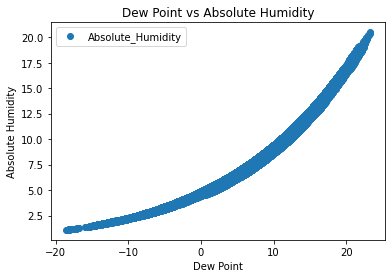

In [6]:
new_df.plot(x='Dew Point', y='Absolute_Humidity', style='o')  
plt.title('Dew Point vs Absolute Humidity')  
plt.xlabel('Dew Point')  
plt.ylabel('Absolute Humidity')  
plt.show()

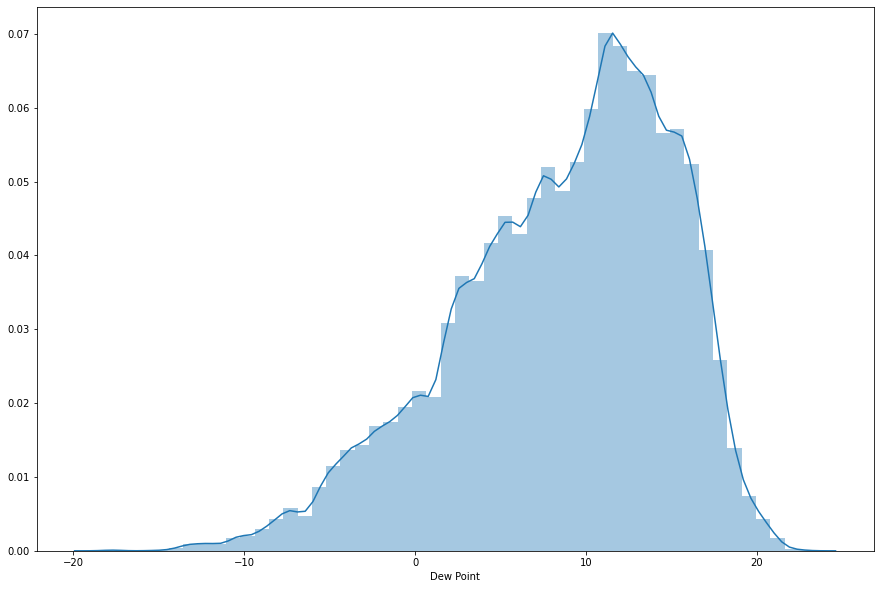

In [7]:
import seaborn as sbn
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

plt.figure(figsize=(15,10))
plt.tight_layout()
sbn.distplot(new_df['Dew Point'])

In [8]:
X = new_df['Dew Point'].values.reshape(-1,1)
y = new_df['Absolute_Humidity'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [9]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
print(regressor.intercept_)

print(regressor.coef_)

[4.58914986]
[[0.5033171]]


In [11]:
y_pred = regressor.predict(X_test)

df_pred_single = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_pred_single

,Actual,Predicted
0,9.732148,10.208585
1,7.132104,7.498544
2,6.140879,6.714713
3,3.518103,2.561721
4,14.077094,13.117973
...,...,...
204311,9.676063,10.307774
204312,3.537399,2.582552
204313,8.243816,8.987751
204314,11.283796,11.342906


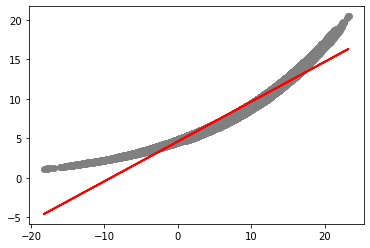

95.2742221934331 %


In [12]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()
accuracy = regressor.score(X_test, y_test)
print(accuracy*100,'%')

In [13]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.546338192199048
Mean Squared Error: 0.5135924738595623
Root Mean Squared Error: 0.7166536638150692


""" Multiple feature fit """

In [14]:
X = new_df[['Year', 'Month', 'Day', 'Hour', 'Minute', 'FW_PG', 'Wind_Speed', 'Wind_Direction', 'Relative_Humidity', 'Pressure', 'Precipitation', 'Dew Point']].values
y = new_df['Temperature'].values

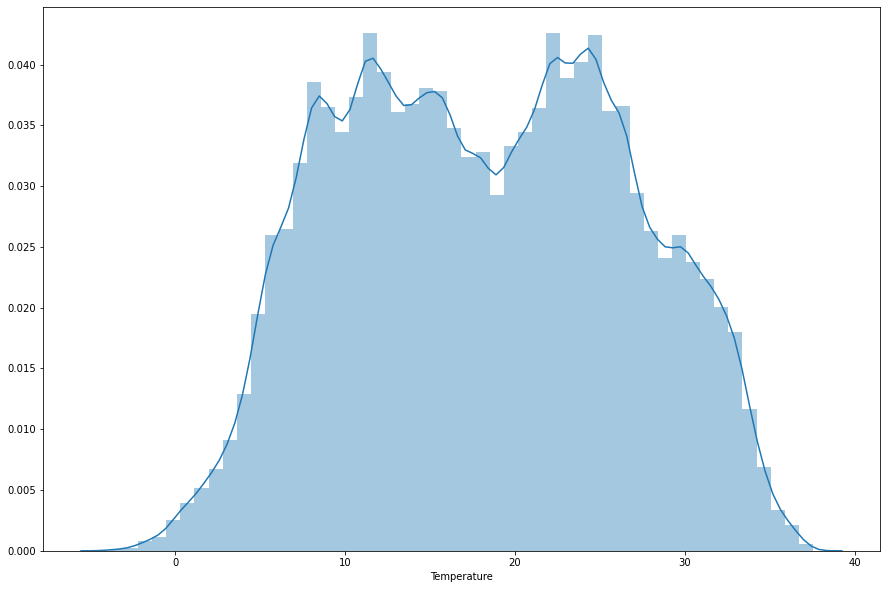

In [15]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sbn.distplot(new_df['Temperature'])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
coeff_df = pd.DataFrame(regressor.coef_, columns=['Coefficient'])  
coeff_df

,Coefficient
0,-0.138383
1,0.019906
2,0.000761
3,0.006018
4,0.000055
5,0.001280
6,-0.185731
7,-0.000398
8,-0.287493
9,-0.014678


In [18]:
y_pred = regressor.predict(X_test)

df_pred_mult = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_pred_mult

,Actual,Predicted
0,22.52,23.463637
1,6.97,5.501477
2,18.72,19.279936
3,6.78,8.361674
4,24.19,25.144441
...,...,...
204311,28.14,27.516572
204312,6.12,7.493700
204313,23.57,24.057625
204314,22.58,23.562195


In [19]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.1132895468235027
Mean Squared Error: 2.1084311787477548
Root Mean Squared Error: 1.4520437936741972


In [20]:
accuracy = regressor.score(X_test, y_test)
print(accuracy*100,'%')

97.00844153733634 %


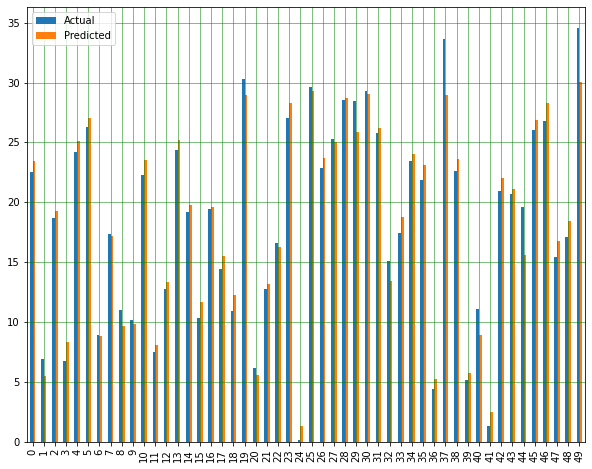

In [21]:
df_pred_mult = df_pred_mult.head(50)
df_pred_mult.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()